In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree
from IPython.display import SVG
from IPython.display import display
from subprocess import call
import pydotplus
from sklearn.externals.six import StringIO
from sklearn.model_selection import cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pylab as p1

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# Read the data file
data = pd.read_csv('downloads/Abalone.csv')

In [3]:
# Display top of dataframe
data.head()

,sex,length,diameter,height,weight.w,weight.s,weight.v,weight.sh,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
# Get basic information regarding the dataset and check if there are an missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
sex          4177 non-null object
length       4177 non-null float64
diameter     4177 non-null float64
height       4177 non-null float64
weight.w     4177 non-null float64
weight.s     4177 non-null float64
weight.v     4177 non-null float64
weight.sh    4177 non-null float64
rings        4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
# Get Summary statistics of the dataset
data.describe()

,length,diameter,height,weight.w,weight.s,weight.v,weight.sh,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


(array([  17.,  431., 1648., 1388.,  329.,  228.,  100.,   29.,    4.,
           3.]),
 array([ 1. ,  3.8,  6.6,  9.4, 12.2, 15. , 17.8, 20.6, 23.4, 26.2, 29. ]),
 <a list of 10 Patch objects>)

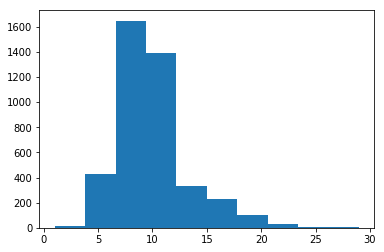

In [7]:
# Check the distribution of our target variable (rings)
plt.hist(data['rings'])


In [8]:
# Check to see if there is any relationship between the categorical variable(sex) and target variable
data.groupby('sex')['rings'].mean()

sex
F    11.129304
I     7.890462
M    10.705497
Name: rings, dtype: float64

In [126]:
# Find all the correlations and sort 
correlations = data.corr()['rings'].sort_values
correlations

<bound method Series.sort_values of sex         -0.351822
length       0.556720
diameter     0.574660
height       0.557467
weight.w     0.540390
weight.s     0.420884
weight.v     0.503819
weight.sh    0.627574
rings        1.000000
Name: rings, dtype: float64>

In [11]:
# Change the categoricl variables to numerical for better modeling
data['sex'] = data['sex'].map({'M':0,'F':1,'I':2})

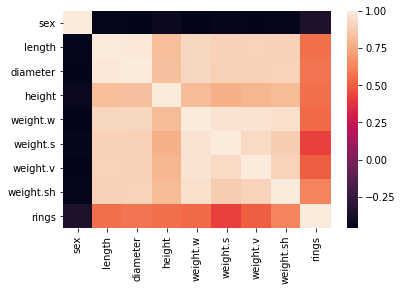

In [12]:
# Check to see if any collinearity exists between features
corr = (data.corr())
sns.heatmap(corr)

In [14]:
# Use Recursive Feature Elimination(RFE) for Feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression()
rfe = RFE(model,4)
rfe = rfe.fit(data.iloc[:,0:7],data['rings'])

In [15]:
# Get the feature ranking with RFE
print(rfe.support_)
print(rfe.ranking_)

[False False  True False  True  True  True]
[4 3 1 2 1 1 1]


In [16]:
# Drop features which are of least relevance for the model
data1 = data.drop(['sex','length','height'],axis=1)

In [17]:
# Split the Dataset into two (features and target)
y = data1['rings']
X = data1.iloc[:,0:4]

In [18]:
# Split into 70% training and 30% testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 10)

In [127]:
# Define Function to calculate mean absolute error of a naive baseline model. 
# I used median value of the target variable as my baseline
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))
baseline_guess = np.median(y)
print('Mean Absolute Error for Naive Baseline Model is is %0.4f' %(mae(y_test,baseline_guess)))

Mean Absolute Error for Naive Baseline Model is is 2.3844


In [20]:
# Create a Scaler object and fit on training data
# Transform both training and test data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [128]:
# Create 4 models. Fit and predict on test data and compare the mean absolute error of each model. 
# Choose model with lowest mean absolute error. 
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
grad_boosted = GradientBoostingRegressor()
randf = RandomForestRegressor()
svr = SVR()
knn = KNeighborsRegressor()
ma = []
list = [grad_boosted,randf,svr,knn]
labels = ['Gradient Boosted Regressor','Random Forest Regressor','Support Vector Regressor','K nearest Regressor']
for i in list:
    i.fit(X_train,y_train)
    predictions = i.predict(X_test)
    ma.append(np.mean(abs(predictions - y_test)))

<BarContainer object of 4 artists>

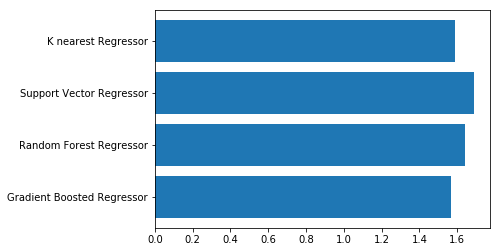

In [130]:
# Plot the graph of mean absolute error and model
# Clearly Gradient Boosted Regressor has the best performance among all models. 
plt.barh(labels, ma)


In [23]:
# Loss function to be optimized
loss = ['ls', 'lad', 'huber']

# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Define hyperparameter grid
hyperparameter_grid = {'loss':loss,'n_estimators':n_estimators,'max_depth':max_depth,'min_samples_leaf':min_samples_leaf,'min_samples_split':min_samples_split,'max_features':max_features}

In [24]:
# Create the model to use for hyperparameter tuning
# Set up the random search with 4-fold cross validation
# Fit on training data
from sklearn.model_selection import RandomizedSearchCV
model = GradientBoostingRegressor(random_state=10)
random_cv = RandomizedSearchCV(estimator = model, param_distributions=hyperparameter_grid,
                               cv=4, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)
random_cv.fit(X_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.5min finished


RandomizedSearchCV(cv=4, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=10,
             subsample=1.0, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'loss': ['ls', 'lad', 'huber'], 'n_estimators': [100, 500, 900, 1100, 1500], 'max_depth': [2, 3, 5, 10, 15], 'min_samples_leaf': [1, 2, 4, 6, 8], 'min_samples_split': [2, 4, 6, 10], 'max_features': ['auto', 'sqrt', 'log2', None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=1)

In [25]:
# Find the best combination of parameters
random_cv.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=5,
             max_features='log2', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=8, min_samples_split=6,
             min_weight_fraction_leaf=0.0, n_estimators=900,
             presort='auto', random_state=10, subsample=1.0, verbose=0,
             warm_start=False)

In [26]:
# Define model with the best combination of parameters
final_model = random_cv.best_estimator_

In [132]:
# Fit the best performing model on training data and make predictions
# Calculate the Mean Absolute Error of the model
final_model.fit(X_train,y_train)
predictions = final_model.predict(X_test)
mae1 = (np.mean(abs(predictions - y_test)))

In [133]:
# Display the mean absolute error of the final model
# The Machine Leerning model has a 36% improvement over the naive baseline model
print("The Mean Absolute Error of the Model is %0.4f" %mae1)


The Mean Absolute Error of the Model is 1.5132


In [45]:
# Extract the feature importances of our final model
feature_importance = final_model.feature_importances_


   Importance  features
1    0.304887  weight.w
2    0.294843  weight.s
3    0.284807  weight.v
0    0.115464  diameter


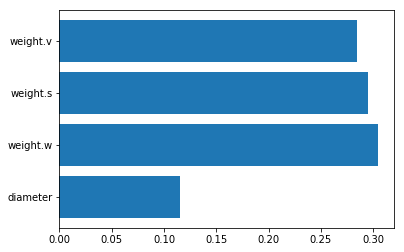

In [54]:
# Load the feature importances into a datafram and sort it by most important to least. 
# Plot the distribution for the same
# Gives as an insight into how our model is working and which features have the most impact on our target variable
features = []
features = (X.columns.values)
plt.barh(features,feature_importance)
feature_df = pd.DataFrame({'features':features,'Importance':feature_importance})
print(feature_df.sort_values('Importance',ascending=False))

In [125]:
# Find the residuals
# Exact the worst and best prediction
residuals = abs(predictions - y_test)
rs = residuals.reshape(1,-1)
print("Prediction of the most erroneous values %0.4f" %(predictions[np.argmax(rs)]))
print("Actual value of the most erroneous value %0.4f" %y_test[np.argmax(residuals)])
print("Prediction of the most correct values %0.4f" %(predictions[np.argmin(rs)]))
print("Actual value of the most corrcct value %0.4f" %y_test[np.argmin(residuals)])
wrong = X_test[np.argmax(rs),:]
right = X_test[np.argmin(rs),:]

Prediction of the most erroneous values 11.7384
Actual value of the most erroneous value 23.0000
Prediction of the most correct values 4.0026
Actual value of the most corrcct value 4.0000


/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)
/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


In [121]:
# Create a lime explainer object
import lime
import lime.lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(training_data=X_train,mode='regression',training_labels=y_train,feature_names=features)

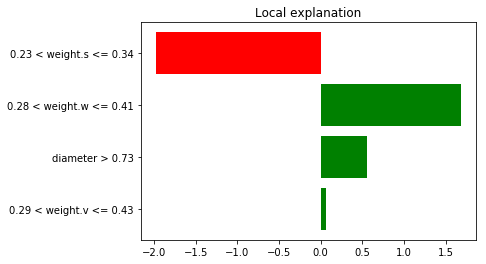

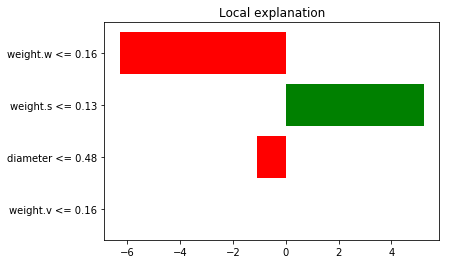

In [124]:
# Display the predicted and true value for the wrong instance
# Explanation for wrong prediction
# Plot the prediction explaination
wrong_exp = explainer.explain_instance(data_row=wrong,predict_fn=final_model.predict)
wrong_exp.as_pyplot_figure();
right_exp = explainer.explain_instance(data_row=right,predict_fn=final_model.predict)
right_exp.as_pyplot_figure();